In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
feats = pd.read_csv("../data/processed/train_features.csv")
target = pd.read_csv("../data/processed/train_target.csv")

feats.set_index('card_id', inplace=True)
target.set_index('card_id', inplace=True)

# Target

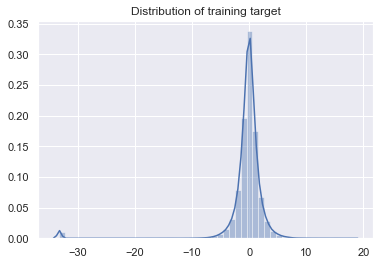

In [3]:
sns.set()
ax = sns.distplot(target)

ax.set_title("Distribution of training target")

plt.show()

# Features

In [4]:
feats = feats.merge(target, on='card_id')

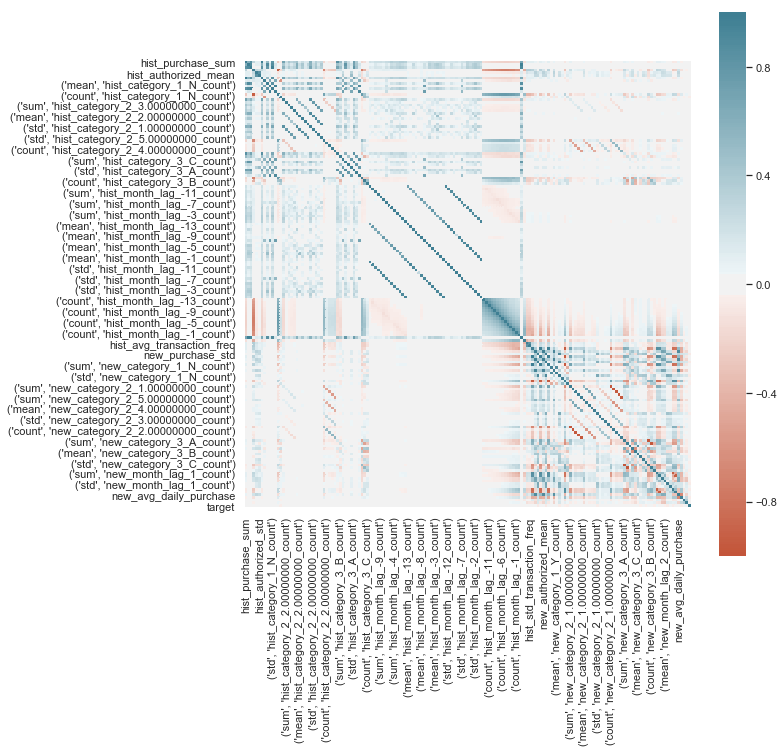

In [5]:
corr_data = feats.corr()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set()
sns.heatmap(corr_data, 
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,
            ax=ax)

plt.show()

In [6]:
X = feats[[c for c in feats.columns if c != 'target']].values
Y = feats[['target']].values.reshape(-1)

In [13]:
X.shape

(165289, 164)

In [14]:
model = LinearRegression()
rfe = RFE(model, 100)
fit = rfe.fit(X, Y)

# Validation

In [15]:
val_X = pd.read_csv("../data/processed/validation_features.csv")
val_y = pd.read_csv("../data/processed/validation_target.csv")

val_X.set_index('card_id', inplace=True)
val_y.set_index('card_id', inplace=True)

val_X = val_X.values
val_y = val_y[['target']].values.reshape(-1)


In [16]:
# Train model on all features
full_model = LinearRegression()
full_model.fit(X, Y)

# Train model on subset features
feat_model = LinearRegression()
feat_model.fit(X[:, fit.support_], Y)

# Make predictions on validation set
full_pred = full_model.predict(val_X)
feat_pred = feat_model.predict(val_X[:, fit.support_])

In [17]:
print(f"Full Model: MAE: {mean_absolute_error(val_y, full_pred)} R2: {r2_score(val_y, full_pred)}")
print(f"Feat Model: MAE: {mean_absolute_error(val_y, feat_pred)} R2: {r2_score(val_y, feat_pred)}")

Full Model: MAE: 1.568100299837713 R2: 0.02052461662223448
Feat Model: MAE: 1.565364578050172 R2: 0.02037587975503441


In [18]:
full_model.score(X, Y)

0.023262682674603963

In [19]:
feat_model.score(X[:, fit.support_], Y)

0.022685338037295555

In [20]:
X.shape

(165289, 164)